<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [819]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [820]:
class Quad_:
    def __init__(self,fuc,N,a,b):
        self.func=fuc
        self.grid=N
        self.lower=a
        self.upper=b
        
        '''The class Quad tkaes four inputs: 
         fuc: a function input,
         N: number of grid points,
         a,b: left and right points'''

## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [821]:
class Quad_:
    def __init__(self,fuc,N,a,b):
        self.func=fuc
        self.grid=N
        self.lower=a
        self.upper=b
    def midpoint(self):
        width=(self.upper-self.lower)/self.grid
        x=[self.lower+i*width+width/2 for i in range(self.grid)]
        return sum([self.func(i) for i in x])*width
    def trap(self):
        width=(self.upper-self.lower)/self.grid
        x=[self.lower+i*width for i in range(self.grid)]
        return sum([self.func(i+width)+self.func(i) for i in x])*width/2
    def simp(self):
        width=(self.upper-self.lower)/self.grid
        x=[self.lower+i*width for i in range(self.grid)]
        return sum([self.func(i)+self.func(i+width)+4*self.func(i+width/2) for i in x])*width/6
def function(x):
    return x**2
a=1
b=4
newQuad=Quad_(function,10000,a,b)
result=newQuad.simp()
print(f'Simps is {result}')
result=newQuad.trap()
print(f'Trap is {result}')
result=newQuad.midpoint()
print(f'Midpoint is {result}')
print((b**3)/3-(a**3)/3)
'''Wow it was a little weird to not work in numpy and work soley in python native functions'''

Simps is 20.999999999999922
Trap is 21.000000045000004
Midpoint is 20.999999977499986
21.0


'Wow it was a little weird to not work in numpy and work soley in python native functions'

<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

For change of variables we can find new bounds and the new expression for $dx$.\\
For $x=1$ we have:
\begin{align}
    1 &\to \frac{b-a}{2} (1) +\frac{a+b}{2}\\
    1 &\to b
\end{align}
For $x=-1$ we have:
\begin{align}
    -1 &\to \frac{b-a}{2} (-1) +\frac{a+b}{2}\\
    -1 &\to a
\end{align}
For $dx$ we can see that:
\begin{align}
    dx &\to \frac{b-a}{2} dx
\end{align}
Thus we have:
\begin{align}
    \int_{-1}^{1} f(x) dx &\approx \sum_{i=1}^{N} w_i~f(x_i)\\
    &\to \\
    \int_{a}^{b} f(x) dx \cdot (\frac{2}{b-a}) &\approx \sum_{i} w_i~f(\frac{b - a}{2} x_i + \frac{a + b}{2})\\
    \int_{a}^{b} f(x) dx &\approx \frac{b-a}{2} \cdot \sum_{i} w_i~f(\frac{b - a}{2} x_i + \frac{a + b}{2})
\end{align}

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

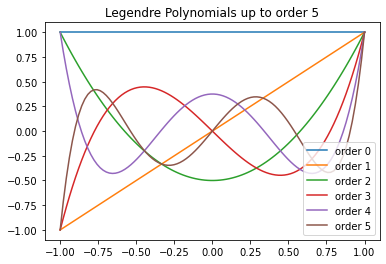

In [822]:
class Gauss_Quad_(Quad_):
    def __init__(self,order,func,N,a,b):
        super().__init__(func,N,a,b)
        self.order=order
    def legendre_poly(self,x):
        poly=[] #I have a vendetta against using np.append() 
        poly.append(np.full(self.grid,1)) #the 0th order is P(x)=1
        for n in range(self.order):
            #we will use the recursion relation:
            nextorder=(2*n+1)*x*poly[n]-n*poly[n-1]
            nextorder/=(n+1)
            poly.append(nextorder)
        return poly
N=100
#to plot M=[1,2,3,4,5] the max order is 5
maxorder=5
childClass=Gauss_Quad_(maxorder,function,N,1,4)
x=np.linspace(-1,1,N)
poly=childClass.legendre_poly(x)
for i,y in enumerate(poly):
    plt.plot(x,y,label=f'order {i}')
plt.legend()
plt.title("Legendre Polynomials up to order 5")
plt.show()
#looks like we have the 0th one too!

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

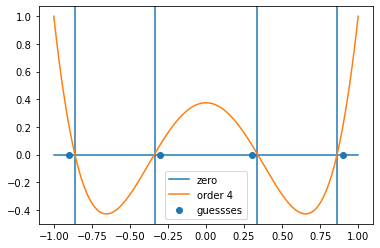

In [823]:
class Gauss_Quad_(Quad_):
    def __init__(self,order,func,N,a,b):
        super().__init__(func,N,a,b)
        self.order=order
    def legendre_poly(self,x):
        poly=[] #I have a vendetta against using np.append() 
        poly.append(np.full(self.grid,1)) #the 0th order is P(x)=1
        for n in range(self.order):
            #we will use the recursion relation:
            nextorder=(2*n+1)*x*poly[n]-n*poly[n-1]
            nextorder/=(n+1)
            poly.append(nextorder)
        return poly
    def newton_method_root(self,x0,M,steps):
        if M>self.order:
            print(f'Chosen order ({M}) must be less than or equal to the num of calculated orders ({self.order})\n')
        #time to get smart about guessing: An order M poly. will have M zeros (and should be symmetrical around 0)
        guess=np.linspace(-.9,.9,M)
        x=np.linspace(-2,2,self.grid) #this solves Nan issues when crossing +-1 in Newton's method
        poly=self.legendre_poly(x)
        y=poly[M] #must choose the order of polynomials to analyze
        polyprime=(M/(-1+x**2))*(x*poly[M]-poly[M-1])
        roots=[]
        weights=[]
        for root in guess:
            for i in range(steps):
                index=np.abs(x-root).argmin()
                root=root-(poly[M][index]/polyprime[index])
            roots.append(root)
            weights.append(2/((1-root**2)*(polyprime[index]**2)))
            plt.axvline(x=root)
        x=x0 #back to using the usual (-1,1) grid
        poly=self.legendre_poly(x)
        y=poly[M]
        plt.plot(x,np.full(len(x),0),label='zero')
        plt.plot(x,y,label=f'order {M}')
        plt.scatter(guess,np.full(len(guess),0),label='guessses')
        plt.legend()
        plt.show()
        #to calculate the root and 
        return roots,weights
N=1000
newtonInstance=Gauss_Quad_(100,function,N,1,4)
x=np.linspace(-1,1,N)
result=newtonInstance.newton_method_root(x,4,20)
# M=[1,2,3,4,5]
# pathname='RootsWeights.txt'
# with open(pathname, 'w') as file:
#     for m in M:
#         item=str(newtonInstance.newton_method_root(x,m,15))
#         file.write("%s\n" % item)
# guess=np.linspace(-.9,.9,M) this methods gives an even distribution of guesses. 
#This is good for lower orders (<7) but for higher orders, 
#the zeros are more clustered around the end points, so the even distribution misses them.
# a good example of this is for M=15, To solve this I would make an bimodal exponential distribution of guesses. 
#another issue is that if Newton's method goes outside of (-1,1) it can't come back, 
#either because crossing +-1 divides by zero or because the function is only defined (-1,1) (x=np.linspace(-1,1,N))
#After adding a wider test x (-2,2), numpy no longer diverges to np.inf. 
#this also brings up a better idea, which is that for a guess to work, 
#it has to be on the correct side of the local extrema. The local extrema are related to the previous orders' zeros.
#using this could get much better guesses by seeding Newton's method recursively,
#with two guesses on either side of the extrema
#again, M=15 is a great example of this issue
#to make this more efficient, the zeros are all symmetric, so they could be calculated for (0,1) and mirrored

## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [824]:
# Add the following to the class in part D). 
from scipy.special import roots_legendre 
class Gauss_Quad_(Quad_):
    def __init__(self,order,func,N,a,b):
        super().__init__(func,N,a,b)
        self.order=order
    def legendre_poly(self,x):
        poly=[] #I have a vendetta against using np.append() 
        poly.append(np.full(self.grid,1)) #the 0th order is P(x)=1
        for n in range(self.order):
            #we will use the recursion relation:
            nextorder=(2*n+1)*x*poly[n]-n*poly[n-1]
            nextorder/=(n+1)
            poly.append(nextorder)
        return poly
    def newton_method_root(self,x0,M,steps):
        if M>self.order:
            print(f'Chosen order ({M}) must be less than or equal to the num of calculated orders ({self.order})\n')
        #time to get smart about guessing: An order M poly. will have M zeros (and should be symmetrical around 0)
        guess=np.linspace(-.9,.9,M)
        x=np.linspace(-2,2,self.grid) #this solves Nan issues when crossing +-1 in Newton's method
        poly=self.legendre_poly(x)
        y=poly[M] #must choose the order of polynomials to analyze
        polyprime=(M/(-1+x**2))*(x*poly[M]-poly[M-1])
        roots=[]
        weights=[]
        for root in guess:
            for i in range(steps):
                index=np.abs(x-root).argmin()
                root=root-(poly[M][index]/polyprime[index])
            roots.append(root)
            weights.append(2/((1-root**2)*(polyprime[index]**2)))
        x=x0 #back to using the usual (-1,1) grid
        poly=self.legendre_poly(x)
        y=poly[M]
        return roots,weights
    def scipy_method_root(self,M):
        if M>self.order:
            print(f'Chosen order ({M}) must be less than or equal to the num of calculated orders ({self.order})\n')
        root,weights=roots_legendre(M)
        return root,weights
M=[1,2,3,4,5]
for m in M:
    newInstance=Gauss_Quad_(100,function,100,1,4)
    x=np.linspace(-1,1,100)
    r1,w1=newInstance.newton_method_root(x,m,10)
    r2,w2=newInstance.scipy_method_root(m)
    print(f'The Absolute difference of the roots  for {m} is {r1-r2}')
    print(f'The Absolute difference of the weights for {m} is {w1-w2}')
    
print('\nYes they agree!')

The Absolute difference of the roots  for 1 is [-0.01111111]
The Absolute difference of the weights for 1 is [0.00024694]
The Absolute difference of the roots  for 2 is [-0.01941269  0.01941269]
The Absolute difference of the weights for 2 is [0.16003071 0.16003071]
The Absolute difference of the roots  for 3 is [ 1.74642330e-02 -1.11022302e-15 -1.74642330e-02]
The Absolute difference of the weights for 3 is [-0.08492616  0.00363888 -0.08492616]
The Absolute difference of the roots  for 4 is [-0.01981713 -0.00806809  0.00806809  0.01981713]
The Absolute difference of the weights for 4 is [0.29337135 0.00079754 0.00079754 0.29337135]
The Absolute difference of the roots  for 5 is [ 1.79943915e-02 -1.61878443e-02 -1.12757026e-15  1.61878443e-02
 -1.79943915e-02]
The Absolute difference of the weights for 5 is [-0.04764767  0.08750961  0.00655302  0.08750961 -0.04764767]

Yes they agree!


## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [861]:
class Gauss_Quad_(Quad_):
    def __init__(self,order,func,N,a,b):
        super().__init__(func,N,a,b)
        self.order=order
    def legendre_poly(self,x):
        poly=[] #I have a vendetta against using np.append() 
        poly.append(np.full(self.grid,1)) #the 0th order is P(x)=1
        for n in range(self.order):
            #we will use the recursion relation:
            nextorder=(2*n+1)*x*poly[n]-n*poly[n-1]
            nextorder/=(n+1)
            poly.append(nextorder)
        return poly
    def newton_method_root(self,x0,M,steps):
        if M>self.order:
            print(f'Chosen order ({M}) must be less than or equal to the num of calculated orders ({self.order})\n')
        #time to get smart about guessing: An order M poly. will have M zeros (and should be symmetrical around 0)
        guess=np.linspace(-.9,.9,M)
        x=np.linspace(-2,2,self.grid) #this solves Nan issues when crossing +-1 in Newton's method
        poly=self.legendre_poly(x)
        y=poly[M] #must choose the order of polynomials to analyze
        polyprime=(M/(-1+x**2))*(x*poly[M]-poly[M-1])
        roots=[]
        weights=[]
        for root in guess:
            for i in range(steps):
                index=np.abs(x-root).argmin()
                root=root-(poly[M][index]/polyprime[index])
            roots.append(root)
            weights.append(2/((1-root**2)*(polyprime[index]**2)))
        x=x0 #back to using the usual (-1,1) grid
        poly=self.legendre_poly(x)
        y=poly[M]
        return roots,weights
    def scipy_method_root(self,M):
        if M>self.order:
            print(f'Chosen order ({M}) must be less than or equal to the num of calculated orders ({self.order})\n')
        root,weights=roots_legendre(M)
        return root,weights
    def gauss_quad_newton(self,steps,order): #I didn't spend all that time doing Newton's method to not use it!
        x=np.linspace(-1,1,self.grid)
#         roots,weights=self.scipy_method_root(order)
        roots,weights=self.newton_method_root(x,order,steps)
        roots=np.array(roots)
        result=(self.upper-self.lower)*(roots)/2+(self.upper+self.lower)/2
        result=[self.func(result[i])*weights[i] for i in range(order)]
        result=np.sum(result)*(self.upper-self.lower)/2
        return result
    def gauss_quad_scipy(self,steps,order): #I didn't spend all that time doing Newton's method to not use it!
        x=np.linspace(-1,1,self.grid)
        roots,weights=self.scipy_method_root(order)
#         roots,weights=self.newton_method_root(x,order,steps)
        roots=np.array(roots)
        result=(self.upper-self.lower)*(roots)/2+(self.upper+self.lower)/2
        result=[self.func(result[i])*weights[i] for i in range(order)]
        result=np.sum(result)*(self.upper-self.lower)/2
        return result
# N=100000 #grid 
# steps=20
# order=4
# def function(x):
#     return x**2
# a=-1
# b=6
# newInstance=Gauss_Quad_(100,function,N,a,b)
# result=newInstance.gauss_quad(steps,order)
# print('\n',result)
# print((b**3)/3-(a**3)/3)
#We can see that the scipy method does much better, as (I assume) it has a lookup table of zeros and will always get it right
#my method could give better results, if I gave Newton's methods a tolerance but that is only one more thing to go wrong. 
#for M=[1,2,3,4,5] it gives reasonable results and that is good enough

<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





<ipython-input-861-2be86e69f358>:22: RuntimeWarning: divide by zero encountered in true_divide
  polyprime=(M/(-1+x**2))*(x*poly[M]-poly[M-1])
<ipython-input-861-2be86e69f358>:22: RuntimeWarning: invalid value encountered in multiply
  polyprime=(M/(-1+x**2))*(x*poly[M]-poly[M-1])
<ipython-input-861-2be86e69f358>:28: RuntimeWarning: divide by zero encountered in double_scalars
  root=root-(poly[M][index]/polyprime[index])
<ipython-input-861-2be86e69f358>:46: RuntimeWarning: invalid value encountered in double_scalars
  result=[self.func(result[i])*weights[i] for i in range(order)]


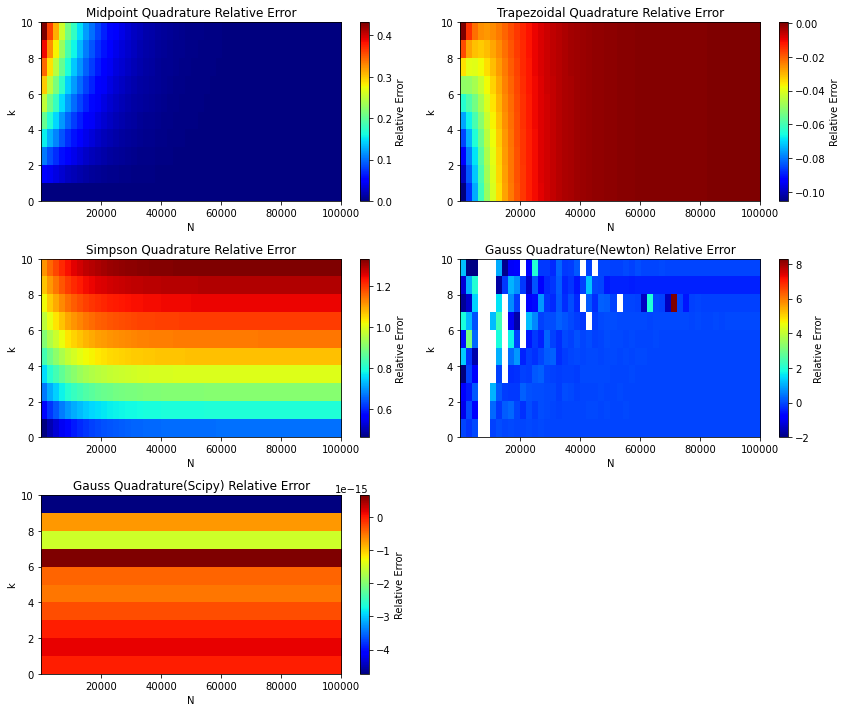

In [863]:
def truepoly(a,b,k):
    return (np.power(b,k+1)-np.power(a,k+1))/(k+1)
def mid_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return np.sum((x**k)) * dx
def trapz_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (np.sum((x**k)) - 0.5*(x[0]**k + x[-1]**k)) * dx
def simpson_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (dx / 3) * np.sum((x[0]**k + 4*x[1:-1]**k + x[-1]**k))

a=0
b=1
steps=100
order=5

y= np.arange(1, 11)
x= np.logspace(1, 5, num=50, dtype=int)

zsimp=np.zeros((len(y),len(x)))
ztrap=np.zeros((len(y),len(x)))
zmidpoint=np.zeros((len(y),len(x)))
zquad1=np.zeros((len(y),len(x)))
zquad2=np.zeros((len(y),len(x)))
for j,k in enumerate(y):
    func=lambda x:x**k
    for i,N in enumerate(x):
        true=truepoly(a,b,k)
        s=simpson_quad(a,b,k,N)
        zsimp[j,i]=2*(s-true)/(s+true)
        m=mid_quad(a,b,k,N)
        zmidpoint[j,i]=2*(m-true)/(m+true)
        t=trapz_quad(a,b,k,N)
        ztrap[j,i]=2*(t-true)/(t+true)
        q=Gauss_Quad_(12,func,N,a,b)
        g=q.gauss_quad_newton(steps,int(k))
        zquad1[j,i]=2*(g-true)/(g+true)
        g=q.gauss_quad_scipy(steps,int(k))
        zquad2[j,i]=2*(g-true)/(g+true)
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.imshow(zmidpoint, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Midpoint Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(3, 2, 2)
plt.imshow(ztrap, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Trapezoidal Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(3, 2, 3)
plt.imshow(zsimp, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Simpson Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(3, 2, 4)
plt.imshow(zquad1, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Gauss Quadrature(Newton) Relative Error')
plt.xlabel('N')
plt.ylabel('k')
plt.subplot(3, 2, 5)
plt.imshow(zquad2, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Gauss Quadrature(Scipy) Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.tight_layout()
plt.show()

## H) Fermi–Dirac


<ipython-input-861-2be86e69f358>:22: RuntimeWarning: divide by zero encountered in true_divide
  polyprime=(M/(-1+x**2))*(x*poly[M]-poly[M-1])
<ipython-input-861-2be86e69f358>:22: RuntimeWarning: invalid value encountered in multiply
  polyprime=(M/(-1+x**2))*(x*poly[M]-poly[M-1])
<ipython-input-861-2be86e69f358>:28: RuntimeWarning: divide by zero encountered in double_scalars
  root=root-(poly[M][index]/polyprime[index])
<ipython-input-865-1fc8bdd338c8>:27: RuntimeWarning: overflow encountered in exp
  func=lambda x:1/(1+np.exp(-k*x))


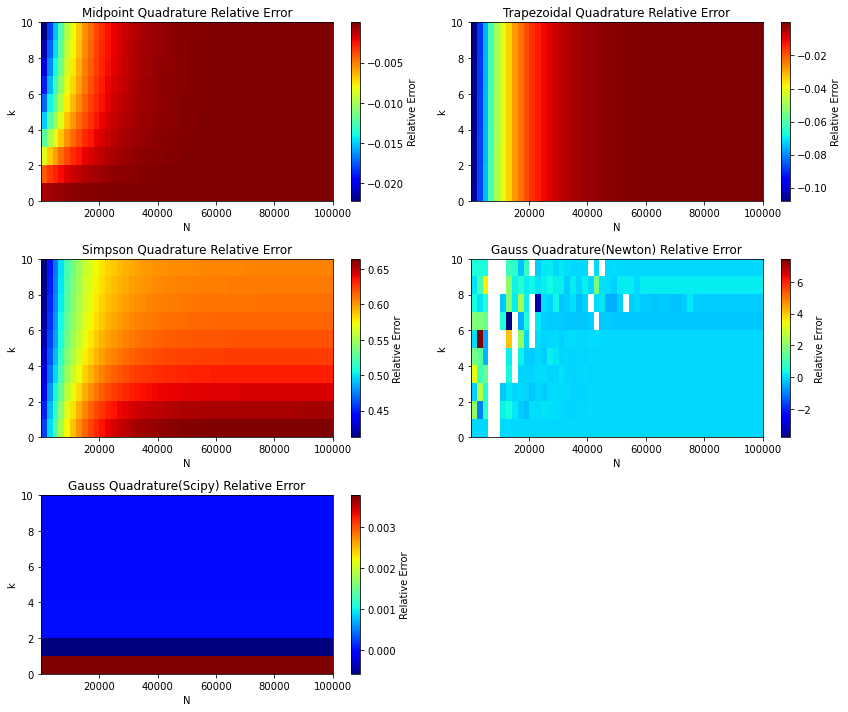

In [865]:
def trueFD(a,b,k):
    return (np.log(np.exp(b*k)+1)-np.log(np.exp(a*k)+1))/k

def mid_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return np.sum(1/(1+np.exp(-k*x))) * dx
def trapz_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (np.sum(1/(1+np.exp(-k*x))) - 0.5*(1/(1+np.exp(-k*x[0])) + 1/(1+np.exp(-k*x[-1])))) * dx
def simpson_quad(a, b, k, N):
    x = np.linspace(a, b, N)
    dx = (b - a) / N
    return (dx / 3) * np.sum((1/(1+np.exp(-k*x[0])) + 4/(1+np.exp(-k*x[1:-1])) + 1/(1+np.exp(-k*x[-1]))))
a=0
b=1
steps=200
y = np.arange(1, 11)
x = np.logspace(1, 5, num=50, dtype=int)
zsimp=np.zeros((len(y),len(x)))
ztrap=np.zeros((len(y),len(x)))
zmidpoint=np.zeros((len(y),len(x)))
zquad1=np.zeros((len(y),len(x)))
zquad2=np.zeros((len(y),len(x)))
for j,k in enumerate(y):
    func=lambda x:1/(1+np.exp(-k*x))
    for i,N in enumerate(x):
        true=trueFD(a,b,k)
        s=simpson_quad(a,b,k,N)
        zsimp[j,i]=2*(s-true)/(s+true)
        m=mid_quad(a,b,k,N)
        zmidpoint[j,i]=2*(m-true)/(m+true)
        t=trapz_quad(a,b,k,N)
        ztrap[j,i]=2*(t-true)/(t+true)
        q=Gauss_Quad_(12,func,N,a,b)
        g=q.gauss_quad_newton(steps,int(k))
        zquad1[j,i]=2*(g-true)/(g+true)
        g=q.gauss_quad_scipy(steps,int(k))
        zquad2[j,i]=2*(g-true)/(g+true)
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.imshow(zmidpoint, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Midpoint Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(3, 2, 2)
plt.imshow(ztrap, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Trapezoidal Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(3, 2, 3)
plt.imshow(zsimp, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Simpson Quadrature Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.subplot(3, 2, 4)
plt.imshow(zquad1, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Gauss Quadrature(Newton) Relative Error')
plt.xlabel('N')
plt.ylabel('k')
plt.subplot(3, 2, 5)
plt.imshow(zquad2, aspect='auto', cmap='jet', origin='lower', extent=[10, 100000, 0, 10])
plt.colorbar(label='Relative Error')
plt.title('Gauss Quadrature(Scipy) Relative Error')
plt.xlabel('N')
plt.ylabel('k')

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [42]:
def V(x):
    return np.power(x,4)
def timep(x, a,m=1):
    integrand=np.sqrt(V(a)-V(x))
    return np.sqrt(8*m)/integrand

## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

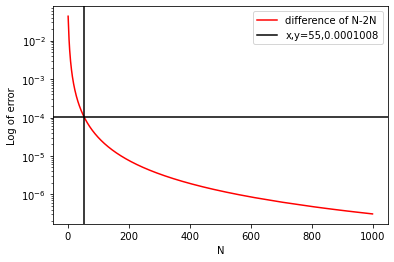

In [43]:
a=2
N=np.arange(1,1000)
results=[np.empty_like(N),np.empty_like(N)]

results[0]=np.array([fixed_quad(timep,a=0,b=a,args=[a],n=i)[0] for i in N])
# plt.plot(N,results[0])
results[1]=np.array([fixed_quad(timep,a=0,b=a,args=[a],n=i)[0] for i in 2*N])
x=N[1:]
y=np.diff(results[0]-results[1])
plt.semilogy(x,y,label=f'difference of N-2N',color='red')
index=np.argmin(np.abs(y-10**-4))
plt.axhline(y=y[index],color='black',label=f'x,y={x[index]},{y[index]:.4g}')
plt.axvline(x=x[index],color='black')
plt.xlabel('N')
plt.ylabel('Log of error')
plt.legend()
plt.show()

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

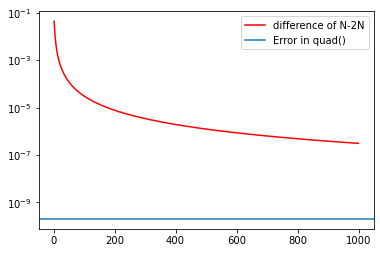

In [44]:
a=2
#I have no idea how to tell quad() how many subdivisions to use, 
#so I will just use it once and compare it to fixed_quad
true_result,true_error=quad(timep,a=0,b=a,args=[a])
x=N[1:]
y=np.diff(results[0]-results[1])
plt.semilogy(x,y,label=f'difference of N-2N',color='red')
plt.axhline(y=true_error,label='Error in quad()')
plt.legend()
plt.show()

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [90]:
a=2
#the function diverges at timep(x=a,a)
print(f'Divergence at x={a},y={timep(x=a,a=a)}')
a_new=a-.1
romberg_result=romberg(timep,a=0,b=a_new,args=[a])
print(f'Integral is {romberg_result}')

Divergence at x=2,y=inf
Integral is 1.533839419567185


<ipython-input-42-4db1e4717aff>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(8*m)/integrand


## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [94]:
a=2
a_new=a-10**-5
romberg_result=romberg(timep,a=0,b=a_new,args=[a],show=True,divmax=10)
print(f'We can use the result from quad() to get the absolute error in romberg: \n {np.abs(true_result-romberg_result)}')

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f87db6b4790> from [0, 1.99999]

 Steps  StepSize   Results
     1  1.999990 158.820789 
     2  0.999995 80.140687 53.913986 
     4  0.499997 40.852201 27.756040 26.012177 
     8  0.249999 21.248278 14.713636 13.844143 13.650999 
    16  0.124999 11.476276  8.218943  7.785963  7.689802  7.666424 
    32  0.062500  6.611947  4.990504  4.775274  4.727486  4.715869  4.712985 
    64  0.031250  4.195270  3.389711  3.282992  3.259305  3.253547  3.252118  3.251761 
   128  0.015625  2.997937  2.598826  2.546101  2.534404  2.531561  2.530855  2.530679  2.530635 
   256  0.007812  2.407066  2.210109  2.184195  2.178450  2.177054  2.176708  2.176621  2.176600  2.176594 
   512  0.003906  2.117141  2.020499  2.007858  2.005059  2.004379  2.004210  2.004168  2.004157  2.004155  2.004154 
  1024  0.001953  1.976062  1.929036  1.922939  1.921591  1.921263  1.921182  1.921162  1.921157  1.921155  1.921155  1.921155 

The final result

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [95]:
a=2
a_new=a-10**-5
romberg_result=romberg(timep,a=0,b=a_new,args=[a],show=True,divmax=15)
print(f'We can use the result from quad() to get the absolute error in romberg: \n {np.abs(true_result-romberg_result)}')

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f87db6deaf0> from [0, 1.99999]

 Steps  StepSize   Results
     1  1.999990 158.820789 
     2  0.999995 80.140687 53.913986 
     4  0.499997 40.852201 27.756040 26.012177 
     8  0.249999 21.248278 14.713636 13.844143 13.650999 
    16  0.124999 11.476276  8.218943  7.785963  7.689802  7.666424 
    32  0.062500  6.611947  4.990504  4.775274  4.727486  4.715869  4.712985 
    64  0.031250  4.195270  3.389711  3.282992  3.259305  3.253547  3.252118  3.251761 
   128  0.015625  2.997937  2.598826  2.546101  2.534404  2.531561  2.530855  2.530679  2.530635 
   256  0.007812  2.407066  2.210109  2.184195  2.178450  2.177054  2.176708  2.176621  2.176600  2.176594 
   512  0.003906  2.117141  2.020499  2.007858  2.005059  2.004379  2.004210  2.004168  2.004157  2.004155  2.004154 
  1024  0.001953  1.976062  1.929036  1.922939  1.921591  1.921263  1.921182  1.921162  1.921157  1.921155  1.921155  1.921155 
  2048  0.000977 

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:796: AccuracyWarning: divmax (20) exceeded. Latest difference = 3.859858e-08
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:796: AccuracyWarning: divmax (20) exceeded. Latest difference = 5.898605e-08
  warnings.warn(


1e-05 71164.56192558081
0.22223222222222222 16.599799498527343
0.44445444444444443 8.312775564690302
0.6666766666666666 5.545626171678319
0.8888988888888888 4.1609018065978765
1.1111211111111112 3.329637784027
1.3333433333333333 2.7752609448490206
1.5555655555555554 2.3791695651476203
1.7777877777777777 2.0820372409405543
2.00001 1.8508939037809804


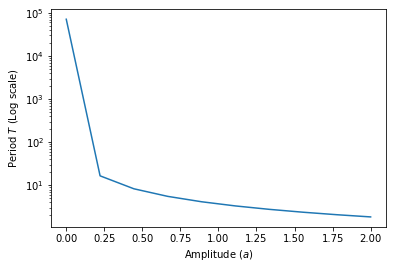

In [121]:
#to do this we will assume the precision is 10^-5
deltax=10**-5
x=np.linspace(0,2,10)+deltax
y=np.empty_like(x)
for i,xi in enumerate(x):
    y[i]=romberg(timep,a=0,b=xi,args=[xi+deltax],divmax=20)
[print(x[i],y[i]) for i in range(len(y))]
plt.semilogy(x,y)
plt.ylabel('Period $T$ (Log scale)')
plt.xlabel('Amplitude ($a$)')
plt.show()

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$
We have:
\begin{align}
    \int _0^\infty \frac{x^3}{e^x -1} dx 
    \to
    \int_0^1 \frac{z^3}{(1-z)^3} \frac{1}{e^{z/(1-z)}-1}\frac{dz}{(1-z)^2}
\end{align}


In [144]:
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = (2*pi*k**4)/((c**2)*(h**3))
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    return np.power(z,3)/((np.exp(z/(1-z))-1)*np.power(1-z,5))

## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [153]:
print(f'True value is {stfconst}')
value=fixed_quad(blackbody_var,a=0,b=1)[0]
value*=prefactor
print(f'Calculated value is {value}')
print(f'Absolute error is {np.abs(stfconst-value)}')

True value is 5.670367e-08
Calculated value is 5.97459477974443e-08
Absolute error is 3.0422777974442974e-09


## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [154]:
def blackbody_og(x):
    return np.power(x,3)/(np.exp(x)-1)
print(f'True value is {stfconst}')
print(f'fixed_quad() calculated answer is {value}')
print(f'Absolute error is {np.abs(stfconst-value)} \n')
value=quad(blackbody_var,a=0,b=1)[0]
value*=prefactor
print(f'quad() calculated answer is {value}')
print(f'Absolute error is {np.abs(stfconst-value)}')


True value is 5.670367e-08
fixed_quad() calculated answer is 5.97459477974443e-08
Absolute error is 3.0422777974442974e-09 

quad() calculated answer is 5.662703503454043e-08
Absolute error is 7.663496545956548e-11


<ipython-input-144-2d54d91fda5c>:12: RuntimeWarning: overflow encountered in exp
  return np.power(z,3)/((np.exp(z/(1-z))-1)*np.power(1-z,5))


<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


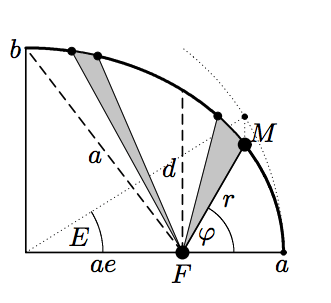


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

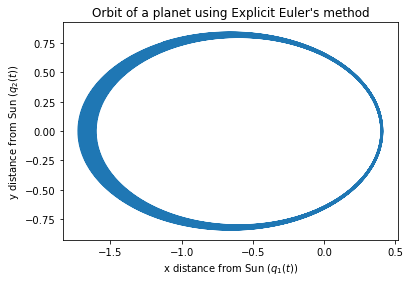

In [640]:
N=int(4e6)
tf=200
t=np.linspace(0,tf,N)
e=.6
q=np.array([[np.full_like(t,1-e),np.full_like(t,0)],[np.full_like(t,0),np.full_like(t,np.sqrt((1+e)/(1-e)))]])
dt=tf/N
for i in range(len(t)):
    if i+1==N:
        break
    divisor=(q[0,:][1,i]**2)+(q[0,:][0,i]**2)
    divisor=np.power(divisor,-3/2)
    q[0,:][:,i+1]=q[0,:][:,i]+dt*q[1,:][:,i]
    q[1,:][:,i+1]=q[1,:][:,i]-dt*q[0,:][:,i]*divisor
x=q[0,:][0]
y=q[0,:][1]
plt.plot(x,y)
plt.title("Orbit of a planet using Explicit Euler's method")
plt.xlabel("x distance from Sun ($q_1(t)$)")
plt.ylabel("y distance from Sun ($q_2(t)$)")
plt.show()
x_explicit=x
y_explicit=y

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 ?
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

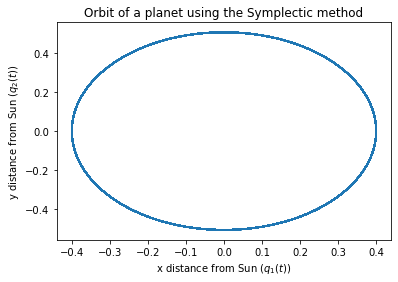

In [699]:
#we will use the second formulation
N=int(4e6)
tf=200
t=np.linspace(0,tf,N)
dt=tf/N
e=.6
q=np.array([[np.full_like(t,1-e),np.full_like(t,0)],[np.full_like(t,0),np.full_like(t,np.sqrt((1+e)/(1-e)))]])
for i in range(len(t)):
    if i+1==N:
        break
    divisor=(q[0,:][1,i+1]**2)+(q[0,:][0,i+1]**2)
    divisor=np.power(divisor,-3/2)
    q[0,:][:,i+1]=q[0,:][:,i]+dt*q[1,:][:,i]
    q[1,:][:,i+1]=q[1,:][:,i]-dt*q[0,:][:,i+1]*divisor
x=q[0,:][0]
y=q[0,:][1]
plt.plot(x,y)
plt.title("Orbit of a planet using the Symplectic method")
plt.xlabel("x distance from Sun ($q_1(t)$)")
plt.ylabel("y distance from Sun ($q_2(t)$)")
plt.show()
plt.show()
x_sympl=x
y_sympl=y

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


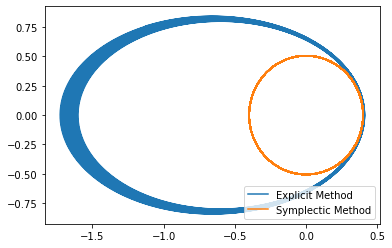

In [676]:
plt.plot(x_explicit,y_explicit,label='Explicit Method')
plt.plot(x_sympl,y_sympl,label='Symplectic Method')
plt.legend()
plt.title('Symplectic Method vs. Explicit Method for planetary orbit')
plt.xlabel("x distance from Sun ($q_1(t)$)")
plt.ylabel("y distance from Sun ($q_2(t)$)")
plt.show()
plt.show()

In [794]:
#just for fun, uncomment and look at the fun colors
# N=int(100000)
# tf=1000
# t=np.linspace(0,tf,N)
# dt=tf/N
# e=.666
# q=np.array([[np.full_like(t,1-e),np.full_like(t,0)],[np.full_like(t,0),np.full_like(t,np.sqrt((1+e)/(1-e)))]])
# dt=tf/N
# for i in range(len(t)):
#     if i+1==N:
#         break
#     divisor=(q[0,:][1,i]**2)+(q[0,:][0,i]**2)
#     divisor=np.power(divisor,-6.6/5) #changed this
#     q[0,:][:,i+1]=q[0,:][:,i]+dt*q[1,:][:,i]
#     q[1,:][:,i+1]=q[1,:][:,i]-dt*q[0,:][:,i]*divisor
# x=q[0,:][0]
# y=q[0,:][1]
# c=np.arange(N)
# plt.scatter(x,y,c=c,cmap='jet',s=1)
# plt.show()